In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import default_rng
from lmfit.models import SineModel
from scipy.optimize import curve_fit
from typing import Optional
import sympy as sp
from sympy.plotting import plot3d
from components import point2d as p2
from components import point3d as p3
from components import antennaPair as antp
from components import antenna as ant
import itertools
import re
%matplotlib inline

In [263]:
c = 2.998e8 #光の速度
f = 920.4e6 #周波数
WAVE_LENGTH = c / f * 100 #理論波長

In [264]:
TARGET_TAG = "E200 470F C1A0 6023 A8E6 010F"

In [265]:
ACTUAL_DISTANCE = list(range(0, 205, 5))

In [266]:
FILE_LIST = [f"..//data//phase_{d}cm.csv" for d in ACTUAL_DISTANCE]
PHI0_FILE = FILE_LIST[20]

In [267]:
def get_phase_list(file:str) -> list:
    df = pd.read_csv(file)
    phase_list = df["Phase"].to_list()
    return phase_list

def get_phase_mean(file:str) -> float:
    phase_list = get_phase_list(file)
    return np.mean(phase_list)

def get_phase_mean_list()->float:
    return [get_phase_mean(file) for file in FILE_LIST]

def get_phi0() -> float:
    return get_phase_mean(PHI0_FILE) - (-4 * np.pi * ACTUAL_DISTANCE[20] / WAVE_LENGTH ) % (2 * np.pi)

def get_actual_phase_list():
    phi0 = get_phase_mean(PHI0_FILE)
    return [(-4 * np.pi * d / WAVE_LENGTH + get_phi0()) % (2 * np.pi) for d in ACTUAL_DISTANCE]

def cul_rmse(measured_list:list, actual_list:list):
    rmse = np.sqrt(np.mean([pow(measured_list[i]-actual_list[i], 2) for i in range(0, len(measured_list))]))
    return rmse

1.1309816421096475


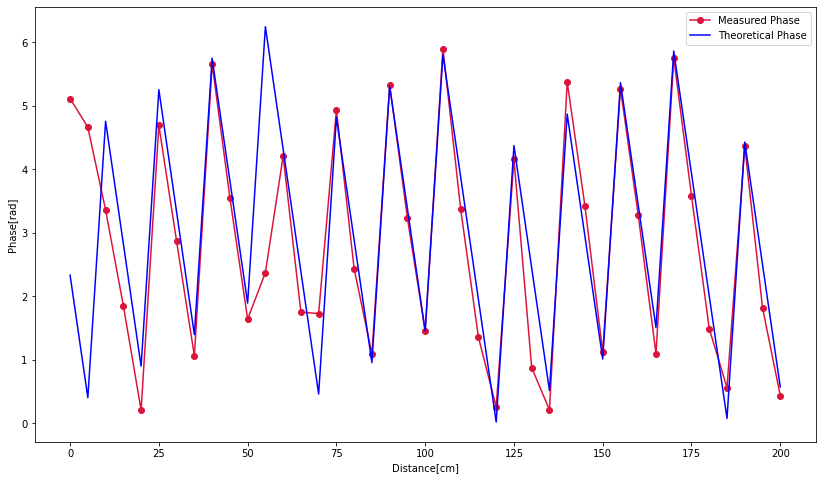

In [268]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(ACTUAL_DISTANCE, get_phase_mean_list(), marker="o", color="crimson", label="Measured Phase")
ax.plot(ACTUAL_DISTANCE, get_actual_phase_list(), color="blue", label="Theoretical Phase")
ax.set_xlabel("Distance[cm]")
ax.set_ylabel("Phase[rad]")
ax.legend()
print(cul_rmse(get_phase_mean_list(), get_actual_phase_list()))

0.4563772271214393


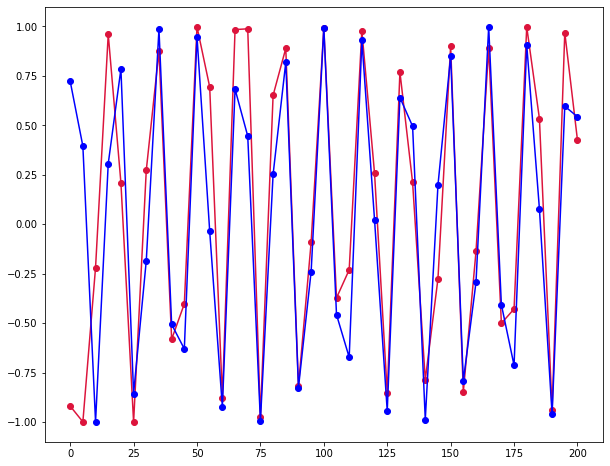

In [269]:
sin_phase_mean = [np.sin(phase_mean) for phase_mean in get_phase_mean_list()]
sin_actual_phase_mean = [np.sin(actual_phase_mean) for actual_phase_mean in get_actual_phase_list()]
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(ACTUAL_DISTANCE, [np.sin(phase_mean) for phase_mean in get_phase_mean_list()], marker="o", color="crimson")
ax.plot(ACTUAL_DISTANCE, [np.sin(actual_phase_mean) for actual_phase_mean in get_actual_phase_list()], marker="o", color="blue")
print(cul_rmse(sin_phase_mean, sin_actual_phase_mean))